## EXPERIMENT 2.2: AdaFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *


from IPython import embed
from scipy import stats


In [2]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/ada_2_2/'


### AdaFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

In [3]:
feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.2/similarity_scores_children_bibel_FINAL_INFERENCE_finetuning_2_2_ofsi_final.pt'
feature_list_adults = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.2/similarity_scores_adults_bibel_retina_FINAL_INFERENCE_finetuning_2_2_ofsi_final.pt'


image_names_c, ids_c, num_ids_c, norm_feats_c = load_adaface_vectors(feature_list_children)
image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors(feature_list_adults)
# image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors_adults(feature_list_adults) # virker for den gamle, men ikke de cropped af en eller anden grund

ids_a = ["_".join(x.split("_")[1:]) for x in ids_a]


# Similarity matrices from adaface - all
sim_mat_c = np.dot(norm_feats_c, norm_feats_c.T)
sim_mat_a = np.dot(norm_feats_a, norm_feats_a.T)


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Finding the right threshold

In [4]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


len(sim_mat_c) 7571
len(sim_mat_c_enrolled_0) 2174
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref2.566666666666667
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref0.0
NEW FPD result:  1.264357909121661
NEW FND result:  1180619441.8889914
NEW GARBE result, GARBE close to 1 means more unfair:  0.19479671279157892
Done for random_state: 1, percentile: 0.0
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref2.900000000000001
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref0.0
NEW FPD result:  1.3642253714824994
NEW FND result:  1333946642.134315
NEW GARBE result, GARBE close to 1 means more unfair:  0.1971285599471002
Done for random_state: 1, percentile: 0.03
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref3.1500000000000004
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref0.6666666666

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FPD_GARBE = (np.abs(fpir_c -fpir_a))/(2*(2**2)*((fpir_c+fpir_a)/2))


enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref1273.3499999999954
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref1254.6333333333328
NEW FPD result:  0.0
NEW FND result:  1.038315508820495
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.8999999999999999
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref1281.8499999999958
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref1262.7999999999995
NEW FPD result:  0.0
NEW FND result:  1.0381441888297813
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.9299999999999999
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref1289.8499999999956
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref1267.9999999999993
NEW FPD result:  0.0
NEW FND result:  1.035

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FPD_GARBE = (np.abs(fpir_c -fpir_a))/(2*(2**2)*((fpir_c+fpir_a)/2))


enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref1247.9928571428538
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref1274.9999999999973
NEW FPD result:  0.0
NEW FND result:  1.0545186223917808
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.87
enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref1267.1261904761877
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref1290.4999999999982
NEW FPD result:  0.0
NEW FND result:  1.051221682046188
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.8999999999999999
enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref1275.7595238095214
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref1300.699999999999
NEW FPD result:  0.0
NEW FND result:  1.0523603813483096
N

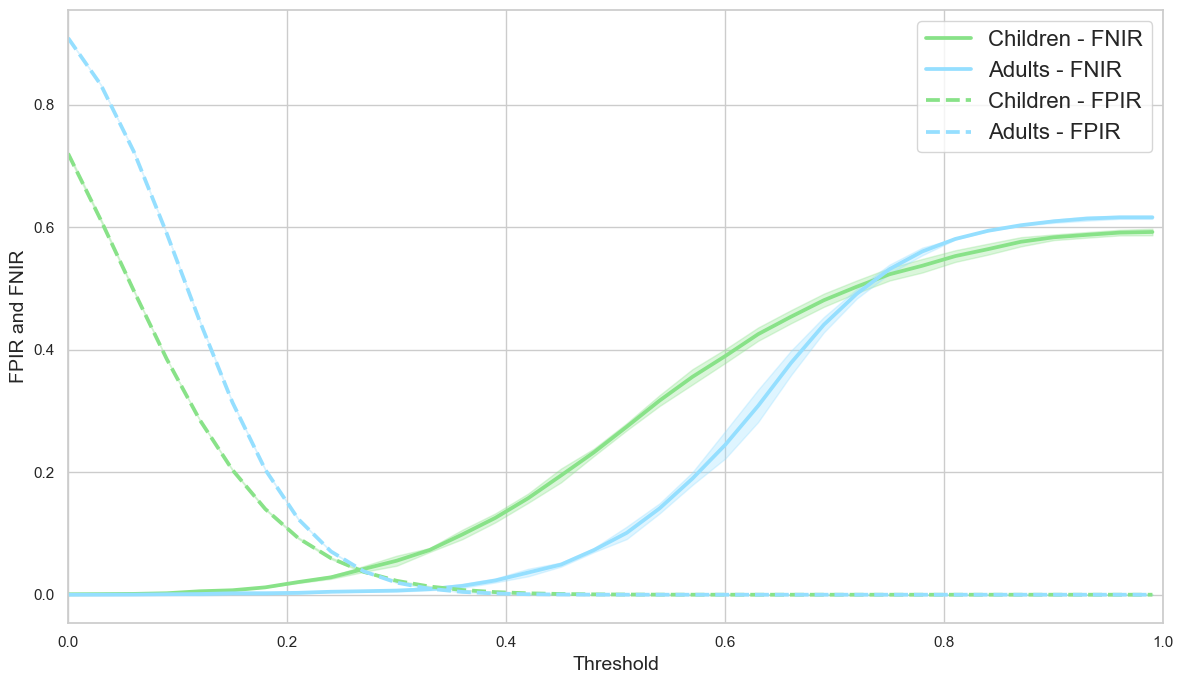

In [5]:

# plot_threshold_metrics_ex_1_1_together(df_all_threshold_x, 'AdaFace')
plot_threshold_metrics_ex_1_1_together_w_conf(df_all_threshold_x, 'AdaFace ex. 2.2', save_fig_path)

# Stats

In [6]:

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, 0.180#df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)

df_all_results.describe().applymap(lambda x: f"{x:.3f}")

len(sim_mat_c) 7571
len(sim_mat_c_reference_cols) 7571
len(sim_mat_c) 7571
len(sim_mat_c_enrolled_0) 2174
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref26.135714285714283
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref7.333333333333333
len(children_all)7817
len(sim_mat_c_non_enrolled_0) 2174
len(num_ids_c_non_enrolled) 2174
len(num_ids_c_reference) 3210
NEW FPD result:  1.4510713602037157
NEW FND result:  3.3819924661031484
NEW GARBE result, GARBE close to 1 means more unfair:  0.11342438374454215
done
len(sim_mat_c) 7571
len(sim_mat_c_reference_cols) 7571
len(sim_mat_c) 7571
len(sim_mat_c_enrolled_0) 2181
enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref26.2126984126984
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref2.5
len(children_all)7817
len(sim_mat_c_non_enrolled_0) 2181
len(num_ids_c_non_enrolled) 2181
len(num_ids_c_reference) 3210
NEW FP

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_12287/1969853084.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.012,0.003,0.139,0.204,1.467,6.116,0.132,0.180
std,3.028,0.001,0.001,0.002,0.001,0.015,4.458,0.029,0.000
min,1.000,0.010,0.001,0.137,0.203,1.437,2.385,0.089,0.180
25%,3.250,0.011,0.002,0.138,0.203,1.459,3.141,0.108,0.180
50%,5.500,0.012,0.003,0.139,0.204,1.468,4.656,0.133,0.180
75%,7.750,0.012,0.004,0.140,0.205,1.478,6.787,0.151,0.180
max,10.000,0.014,0.005,0.143,0.206,1.486,16.905,0.179,0.180


In [7]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{0} & 0.012 & 0.004 & 0.140 & 0.204 & 1.451 & 3.382 & 0.113 & 0.180 \\
\textbf{1} & 0.012 & 0.001 & 0.139 & 0.204 & 1.467 & 10.158 & 0.166 & 0.180 \\
\textbf{2} & 0.013 & 0.004 & 0.139 & 0.203 & 1.456 & 3.042 & 0.106 & 0.180 \\
\textbf{3} & 0.014 & 0.003 & 0.141 & 0.206 & 1.468 & 5.207 & 0.139 & 0.180 \\
\textbf{4} & 0.012 & 0.002 & 0.138 & 0.203 & 1.468 & 7.115 & 0.153 & 0.180 \\
\textbf{5} & 0.011 & 0.005 & 0.137 & 0.203 & 1.475 & 2.385 & 0.089 & 0.180 \\
\textbf{6} & 0.011 & 0.003 & 0.143 & 0.205 & 1.437 & 3.061 & 0.106 & 0.180 \\
\textbf{7} & 0.012 & 0.001 & 0.139 & 0.206 & 1.479 & 16.905 & 0.179 & 0.180 \\
\textbf{8} & 0.010 & 0.002 & 0.137 & 0.204 & 1.486 & 5.802 & 0.145 & 0.180 \\
\textbf{9} & 0.011 & 0.003 & 0.138 & 0.204 & 1.483 & 4.104 & 0.126 & 0.18

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_12287/3719310588.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [8]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{count} & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 \\
\textbf{mean} & 0.012 & 0.003 & 0.139 & 0.204 & 1.467 & 6.116 & 0.132 & 0.180 \\
\textbf{std} & 0.001 & 0.001 & 0.002 & 0.001 & 0.015 & 4.458 & 0.029 & 0.000 \\
\textbf{min} & 0.010 & 0.001 & 0.137 & 0.203 & 1.437 & 2.385 & 0.089 & 0.180 \\
\textbf{25%} & 0.011 & 0.002 & 0.138 & 0.203 & 1.459 & 3.141 & 0.108 & 0.180 \\
\textbf{50%} & 0.012 & 0.003 & 0.139 & 0.204 & 1.468 & 4.656 & 0.133 & 0.180 \\
\textbf{75%} & 0.012 & 0.004 & 0.140 & 0.205 & 1.478 & 6.787 & 0.151 & 0.180 \\
\textbf{max} & 0.014 & 0.005 & 0.143 & 0.206 & 1.486 & 16.905 & 0.179 & 0.180 \\
\bottomrule
\end{tabular} 
\end{table}



/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_12287/2945641856.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [9]:
df_all_results.to_csv('df_all_results_ada_2_2.csv', index=False)


# Stats

In [10]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 17.091085978179184
P-value: 3.614252263498085e-08


# Gemmer simscores

In [11]:

sim_mat_c_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all_ada_2_2.csv', index=False)
# Print the big array
print(len(sim_mat_c_enrolled_iterations_all))

sim_mat_a_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all_ada_2_2.csv', index=False)


# Print the big array
print(len(sim_mat_a_enrolled_iterations_all))

sim_mat_c_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all_ada_2_2.csv', index=False)
# Print the big array
print(len(sim_mat_c_non_enrolled_iterations_all))


sim_mat_a_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all_ada_2_2.csv', index=False)

# Print the big array
print(len(sim_mat_a_non_enrolled_iterations_all))


121238
41438
32751054
32371232


# loader sim scores

In [12]:
sim_mat_c_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_enrolled_iterations_all_ada_2_2.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_enrolled_iterations_all_ada_2_2.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_ada_2_2.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_ada_2_2.csv')).values.flatten()


In [13]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [14]:
mated_scores1 = sim_mat_a_enrolled_iterations_all_ada
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all_ada
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,41438.000000,3.237123e+07
1,Minimum,-0.066702,-3.113085e-01
2,Maximum,0.955272,6.407963e-01
3,Mean,0.621025,1.113240e-01
4,St. Dev.,0.122760,8.618000e-02
5,Skewness,-0.445137,2.053136e-01
6,Ex. Kurtosis,1.127336,2.417112e-01


In [15]:
mated_scores2 = sim_mat_c_enrolled_iterations_all_ada
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all_ada
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,121238.000000,3.275105e+07
1,Minimum,-0.068215,-3.808162e-01
2,Maximum,0.995631,9.998659e-01
3,Mean,0.520030,6.501443e-02
4,St. Dev.,0.168507,1.068352e-01
5,Skewness,-0.036605,3.493207e-01
6,Ex. Kurtosis,-0.186685,2.970495e-01


In [16]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

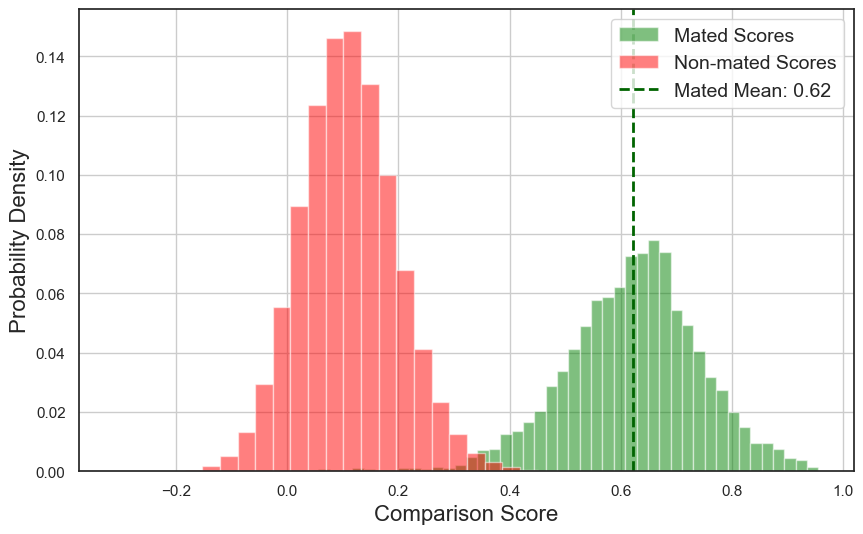

In [17]:
from DET_utils.DET_plots import *

plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - AdaFace ex. 2.2 ', save_fig_path = save_fig_path, gem_som='A1')


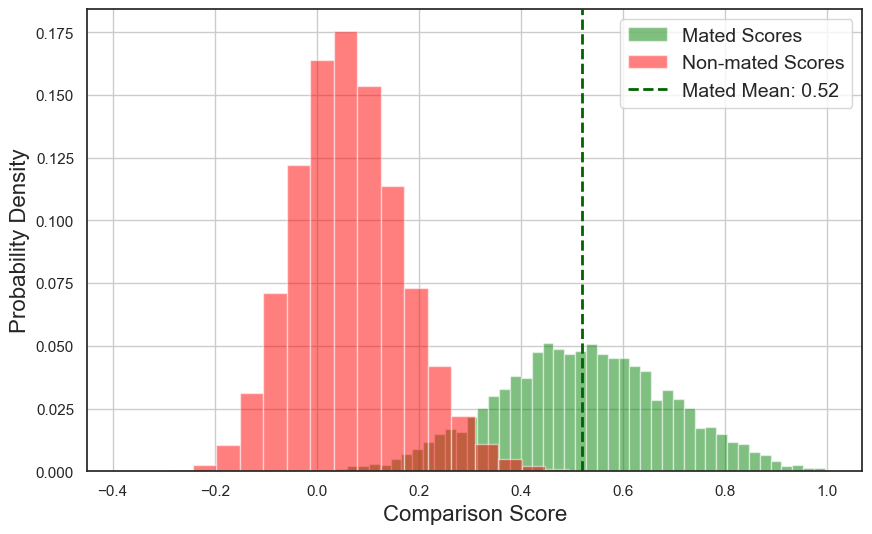

In [18]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - AdaFace ex. 2.2 ', save_fig_path=save_fig_path, gem_som='C1')


# DET curves


In [19]:
from DET_utils.DET_plots import *

In [20]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


d' child = 4.80588
d' adult = 3.22519


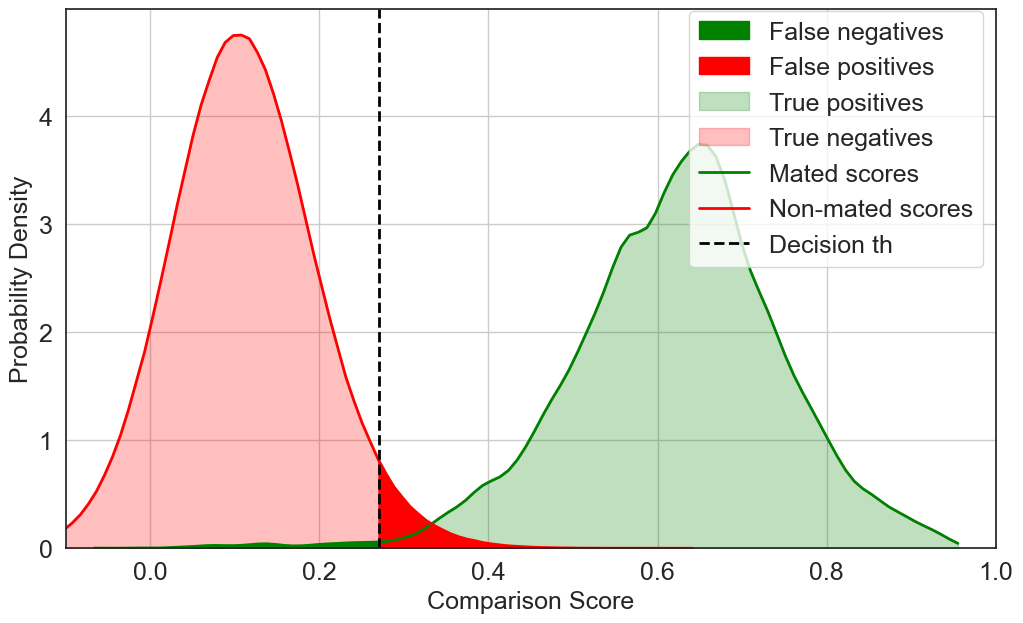

False Negatives: 0.82%


In [21]:
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1,save_fig_path=save_fig_path, title='A2')

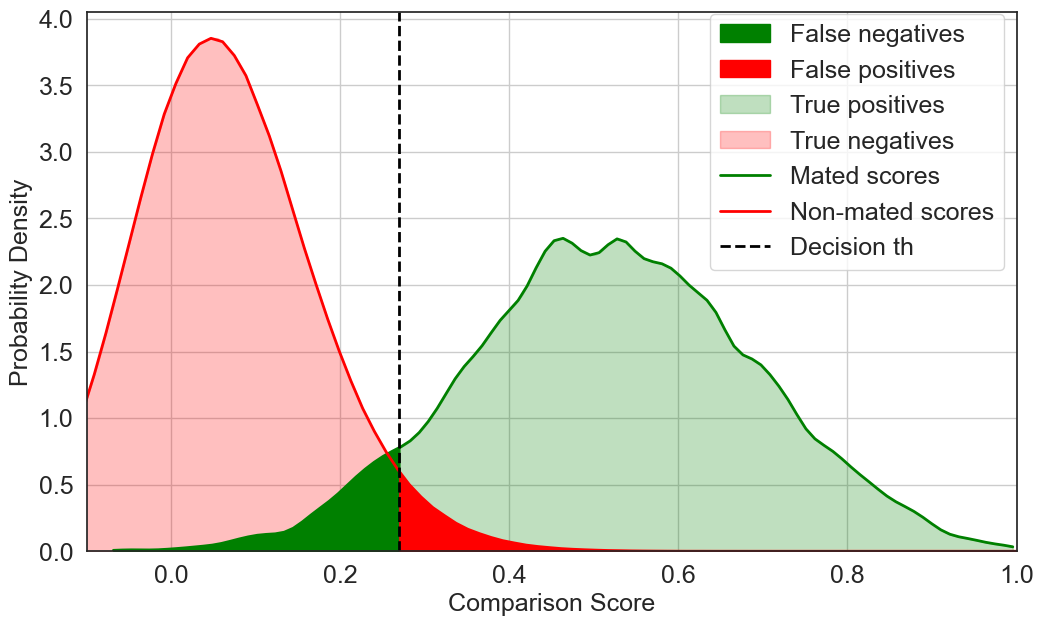

False Negatives: 7.39%


In [22]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2,save_fig_path=save_fig_path, title='C2')

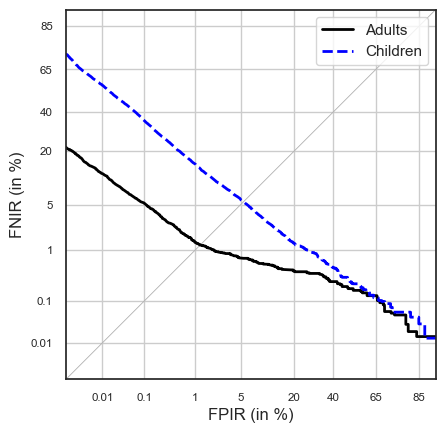

In [23]:
# Remember to save manually
import numpy as np

def DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, score_type= "similarity",title = 'Adults vs Children - MagFace ex. 2.2', save_fig_path= 'save_fig_path'):
    figure_size = (12,7)
    alpha_shade = 0.25
    alpha_fill = 1.0
    linewidth = 2
    legend_loc = "upper left"
    legend_anchor = (1.0, 1.02)
    legend_cols = 1
    legend_fontsize = 18
    label_fontsize = 18
    tick_fontsize = 18
    system_name1 = 'Adults'
    system_name2 = 'Children'

    det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True)#, plot_title=title)
    # det.x_limits = np.array([1e-5, .8])
    # det.y_limits = np.array([1e-5, .8])
    det.x_limits = np.array([1e-5, .9])
    det.y_limits = np.array([1e-5, .9])
    det.x_ticks = np.array([ 1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 65e-2, 85e-2, 95e-2])
    det.x_ticklabels = np.array(['0.01', '0.1', '1', '5', '20', '40', '65', '85', '95'])
    det.y_ticks = np.array([ 1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 65e-2, 85e-2, 95e-2])
    det.y_ticklabels = np.array([ '0.01', '0.1', '1', '5', '20', '40', '65', '85', '95'])

    det.create_figure()
    det.plot(tar=adjust_scores_for_DET(mated_scores1, score_type), non=adjust_scores_for_DET(nonmated_scores1, score_type), label=system_name1)
    det.plot(tar=adjust_scores_for_DET(mated_scores2, score_type), non=adjust_scores_for_DET(nonmated_scores2, score_type), label=system_name2)
    det.legend_on(loc="upper right")
    det.show()


DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, "similarity",'Adults vs Children - AdaFace ex. 2.2', save_fig_path= save_fig_path)
